<a href="https://colab.research.google.com/github/Pratik-03-12/Indian-News-Clustering-using-Word-Embedding-Techniques/blob/main/Final_Clustering_using_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
#from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score

In [3]:
df = pd.read_excel('/content/Research_project_Dataset_1.xlsx')

In [4]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [5]:
def normalize_text(text):
  text = text.lower()
  text = re.sub(r'http\S+|www\S+|https\S+','',text,flags=re.MULTILINE)
  text = re.sub(r'<.*?>','',text)
  text = re.sub(r'[^a-zA-Z\s]','',text)
  text = text.strip()
  return text

In [6]:
df['Cleaned_text_step1'] = df['Summary'].apply(normalize_text)

In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
  return [word for word in tokens if word not in stop_words]

In [9]:
df['Filtered_text_step2']=df['Cleaned_text_step1'].apply(remove_stopwords)

In [10]:
df

,NEWS (Full Transcript),Summary,Catagory,Cleaned_text_step1,Filtered_text_step2
0,slet me try and get details from amin who has ...,slet me try and get details from amin who has...,crime,slet me try and get details from amin who has ...,"[l, e, , e, , r, , n, , g, e, , e, l, , ..."
1,helowan welcome to medical diale ofzemyakshi l...,A senior cardiologys's recent witer post has ...,crime,a senior cardiologyss recent witer post has go...,"[ , e, n, r, , c, r, l, g, , r, e, c, e, n, ..."
2,a study suggest more than eight hundred millio...,Start a day with a glass of water can help ro...,crime,start a day with a glass of water can help roo...,"[r, , , , w, h, , , g, l, , f, , w, e, ..."
3,society enagermental konegaruhe took my child...,In a remote village in madepradesh a nine-yea...,crime,in a remote village in madepradesh a nineyear ...,"[n, , , r, e, e, , v, l, l, g, e, , n, , ..."
4,now jave rekengoa his raced concerns about law...,A criminal involved in landgrabbing escaped t...,crime,a criminal involved in landgrabbing escaped th...,"[ , c, r, n, l, , n, v, l, v, e, , n, , l, ..."
...,...,...,...,...,...
194,banglodesh has approached pakistan to procure ...,banglodesh has approached pakistan to procure...,technology,banglodesh has approached pakistan to procure ...,"[b, n, g, l, e, h, , h, , p, p, r, c, h, e, ..."
195,right-time modihelde meeting in new york with ...,right-time modihelde meeting in new york with...,technology,righttime modihelde meeting in new york with s...,"[r, g, h, e, , h, e, l, e, , e, e, n, g, , ..."
196,when you buy a bike or you sit on a bike you r...,The bike you ride the car you drive tells eve...,technology,the bike you ride the car you drive tells ever...,"[h, e, , b, k, e, , u, , r, e, , h, e, , ..."
197,fo india's ambitiousspotic submission is seit ...,This groundbreaking mission aims to develop a...,technology,this groundbreaking mission aims to develop an...,"[h, , g, r, u, n, b, r, e, k, n, g, , n, , ..."


In [11]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [12]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
  return [lemmatizer.lemmatize(word) for word in tokens]

In [13]:
df['lemmatized_text_step3']=df['Filtered_text_step2'].apply(lemmatize_tokens)

In [14]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embeddings = model.encode(df['lemmatized_text_step3'].tolist(),show_progress_bar=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

In [15]:
embeddings

array([[ 0.19792257,  0.24616703,  0.01217191, ..., -0.08556543,
         0.6433867 ,  0.23217316],
       [ 0.3504756 ,  0.24142437,  0.05218107, ..., -0.23822562,
         0.7177446 ,  0.23196316],
       [-0.20192842, -0.08406166, -0.96718115, ...,  0.14761859,
         0.23666292,  0.02295727],
       ...,
       [-0.31379336,  0.72624046, -0.20671931, ..., -0.18895449,
         0.5054616 ,  0.3127214 ],
       [-0.4394558 ,  0.8847195 , -0.3966086 , ..., -0.19779025,
         0.47550884,  0.23805183],
       [-0.4435655 ,  0.8249734 , -0.49407828, ..., -0.22275712,
         0.5172868 ,  0.2073414 ]], dtype=float32)

In [28]:
from sklearn.cluster import AgglomerativeClustering

n_clusters = 8
clustering1 = AgglomerativeClustering(n_clusters=n_clusters,linkage = 'ward')
df['Cluster'] = clustering1.fit_predict(embeddings)

In [29]:
agglomerative_silhouette = silhouette_score(embeddings, df['Cluster'])  # Use the column where Agglomerative labels are stored
print(f"Agglomerative Clustering Silhouette Score: {agglomerative_silhouette}")

Agglomerative Clustering Silhouette Score: 0.56475430727005


In [30]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_index = davies_bouldin_score(embeddings, df['Cluster'])

print(f"Davies-Bouldin Score: {davies_bouldin_index}")

Davies-Bouldin Score: 1.2550846415278762


In [31]:
from sklearn.cluster import KMeans

n_clusters = 8 # Adjust if necessary based on your findings

# Run KMeans Clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(embeddings)

# Add the KMeans clustering results to the dataset for easy reference
df['KMeans_Cluster'] = kmeans_labels

In [32]:
kmeans_silhouette = silhouette_score(embeddings, kmeans_labels)
print(f"KMeans Clustering Silhouette Score: {kmeans_silhouette}")

KMeans Clustering Silhouette Score: 0.5422839522361755


In [33]:
kmeans_dbi = davies_bouldin_score(embeddings, kmeans_labels)
print(f"KMeans Clustering Davies-Bouldin Index: {kmeans_dbi}")

KMeans Clustering Davies-Bouldin Index: 1.1968429839283163


In [16]:
import matplotlib.pyplot as plt


In [17]:
from sklearn.cluster import KMeans
score = []
for k in range(8,17):
  model = KMeans(n_clusters=k)
  model.fit(embeddings)
  score.append(silhouette_score(embeddings,model.labels_))

In [19]:
from sklearn.cluster import AgglomerativeClustering
score1 = []
for k in range(8,17):
  model = AgglomerativeClustering(n_clusters=k)
  model.fit(embeddings)
  score1.append(silhouette_score(embeddings,model.labels_))

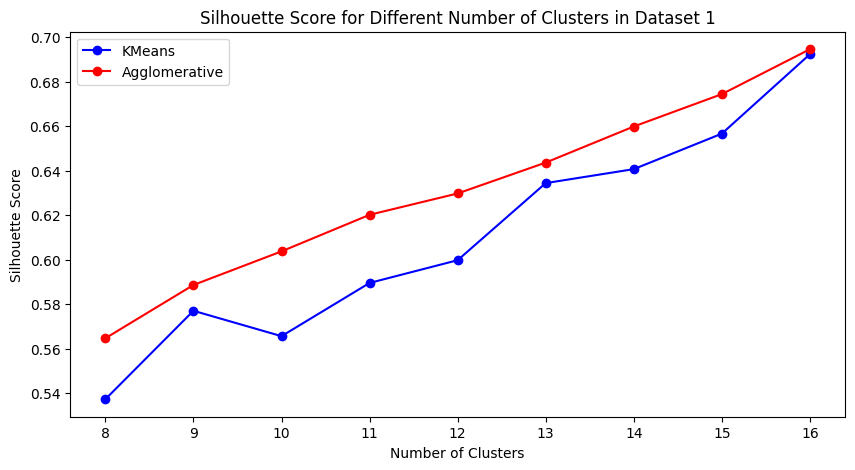

In [27]:
plt.figure(figsize=(10,5))
plt.plot(range(8,17),score,marker='o',color = 'blue')
plt.plot(range(8,17),score1,marker='o',color = 'red')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Number of Clusters in Dataset 1')
plt.legend(['KMeans','Agglomerative'])
plt.show()